#  #    Projemizin amacı bina konumu ve inşaat yönlerine dayanarak, Nepal'deki 2015 Gorkha depreminin neden olduğu hasarı analiz etmek ve binalara verilen hasar                                             seviyesini tahmin etmektir                                                                                                                                 
      
   #   Kullandığımız veri  şimdiye kadar toplanan en büyük afet sonrası veri kümelerinden biridir.              

# Kütüphaneleri Başa Aktarma

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')

# Veri Setini Okuma

In [3]:

test=pd.read_csv("test_values.csv")
train=pd.read_csv("train_values.csv")
train_labels=pd.read_csv("train_labels.csv")
test_labels=pd.read_csv("submission_format.csv")
#Kaggledan aldığımız veri setlerini birleştirelim.
# adding labels to train dataset
train["damage_grade"]=train_labels["damage_grade"]
test["damage_grade"]=test_labels["damage_grade"]
df= pd.concat([train, test], axis=0)



# Veri Setini İnceleme

In [4]:
df.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,2
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1


                        ################         VERİ SETİMİZDEKİ YABANCİ KELİMLERİN TÜRKÇELEŞTİRİLMESİ      ###############

In [5]:
df = df.rename(columns={'age': 'Bina_Yaşı','building_id': 'Bina Numarası','geo_level_1_id': '1.Coğrafi_Bölge_Numarası','geo_level_2_id': '2.Coğrafi_Bölge_Numarası'
                                  ,'geo_level_3_id': '3.Coğrafi_Bölge_Numarası','count_floors_pre_eq': 'Bina_Kat_Sayısı'
                                  ,'area_percentage': 'Bina_Taban_Alan_Yüzdesi','height_percentage': 'Bina_Taban_Alan_Yüksekliği'
                                  ,'land_surface_condition': 'Bina_arazisi_yüzey_durumu','foundation_type': 'İnşaat_Temelinin_Tipi','roof_type': 'Çatı_Tipi'
                                  ,'ground_floor_type': 'Zemin_Katın_Tipi','other_floor_type': 'Diğer_Katların_Tipi','position': 'Bina_Konumu'
                                  ,'plan_configuration': 'Bina_Plan_Yapılandırması','legal_ownership_status': 'Binanın_Yasal_Durumu',
                                  'count_families': 'Binadaki_Aile_Sayisi','has_secondary_use': 'İkincil_Amaçlı_Bina',
                                 'has_secondary_use_agriculture': 'Tarım_Amaçlı_Bina','has_secondary_use_hotel': 'Otel_Amaçlı_Bina',
                                 'has_secondary_use_rental': 'Kiralık_Bina','has_secondary_use_institution': 'Kurum_Kuruluş_Amaçlı_Bina'
                                  ,'has_secondary_use_school': 'Okul_Amaçlı_Bina','has_secondary_use_industry': 'Endüstriyel_Amaçlı_Bina'
                                  ,'has_secondary_use_health_post': 'Sağlık_Merkezi_Amaçlı_Bina','has_secondary_use_gov_office': 'Hükümet_Kurumu_Amaçlı_Bina',
                                 'has_secondary_use_use_police': 'Polis_İstasyonu_Amaçlı_Bina','has_secondary_use_other': 'Diğer_Kullanım_Amaçlı_Bina',
                                 'has_superstructure_adobe_mud': 'Kerpiç_Bina','has_superstructure_mud_mortar_stone': 'Taş-Çamur_Harcından_Bina',
                                  'has_superstructure_stone_flag':'Taştan_Bina',
                                 'has_superstructure_cement_mortar_stone': 'Taş-Çimanto_Harcından_Bina','has_superstructure_mud_mortar_brick': 'Tuğla-Çamur_Harcından_Bina',
                                 'has_superstructure_cement_mortar_brick': 'Tuğla-Çimanto_Harcından_Bina','has_superstructure_timber': 'Kereste_Kullanılan_Bina',
                                 'has_superstructure_bamboo': 'Bambu_Kullanılan_Bina','has_superstructure_rc_non_engineered': 'Mühendislik-Dışı_Beton_Bina',
                                 'has_superstructure_rc_engineered': 'Mühendislik-İşi_Beton_Bina','has_superstructure_other': 'Diğer-Malzemeli_Bina',
                                 'damage_grade': 'Bina_Hasar_Boyutu'})


In [6]:
df.head()

,Bina Numarası,1.Coğrafi_Bölge_Numarası,2.Coğrafi_Bölge_Numarası,3.Coğrafi_Bölge_Numarası,Bina_Kat_Sayısı,Bina_Yaşı,Bina_Taban_Alan_Yüzdesi,Bina_Taban_Alan_Yüksekliği,Bina_arazisi_yüzey_durumu,İnşaat_Temelinin_Tipi,Çatı_Tipi,Zemin_Katın_Tipi,Diğer_Katların_Tipi,Bina_Konumu,Bina_Plan_Yapılandırması,Kerpiç_Bina,Taş-Çamur_Harcından_Bina,Taştan_Bina,Taş-Çimanto_Harcından_Bina,Tuğla-Çamur_Harcından_Bina,Tuğla-Çimanto_Harcından_Bina,Kereste_Kullanılan_Bina,Bambu_Kullanılan_Bina,Mühendislik-Dışı_Beton_Bina,Mühendislik-İşi_Beton_Bina,Diğer-Malzemeli_Bina,Binanın_Yasal_Durumu,Binadaki_Aile_Sayisi,İkincil_Amaçlı_Bina,Tarım_Amaçlı_Bina,Otel_Amaçlı_Bina,Kiralık_Bina,Kurum_Kuruluş_Amaçlı_Bina,Okul_Amaçlı_Bina,Endüstriyel_Amaçlı_Bina,Sağlık_Merkezi_Amaçlı_Bina,Hükümet_Kurumu_Amaçlı_Bina,Polis_İstasyonu_Amaçlı_Bina,Diğer_Kullanım_Amaçlı_Bina,Bina_Hasar_Boyutu
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [7]:
df.tail()

,Bina Numarası,1.Coğrafi_Bölge_Numarası,2.Coğrafi_Bölge_Numarası,3.Coğrafi_Bölge_Numarası,Bina_Kat_Sayısı,Bina_Yaşı,Bina_Taban_Alan_Yüzdesi,Bina_Taban_Alan_Yüksekliği,Bina_arazisi_yüzey_durumu,İnşaat_Temelinin_Tipi,Çatı_Tipi,Zemin_Katın_Tipi,Diğer_Katların_Tipi,Bina_Konumu,Bina_Plan_Yapılandırması,Kerpiç_Bina,Taş-Çamur_Harcından_Bina,Taştan_Bina,Taş-Çimanto_Harcından_Bina,Tuğla-Çamur_Harcından_Bina,Tuğla-Çimanto_Harcından_Bina,Kereste_Kullanılan_Bina,Bambu_Kullanılan_Bina,Mühendislik-Dışı_Beton_Bina,Mühendislik-İşi_Beton_Bina,Diğer-Malzemeli_Bina,Binanın_Yasal_Durumu,Binadaki_Aile_Sayisi,İkincil_Amaçlı_Bina,Tarım_Amaçlı_Bina,Otel_Amaçlı_Bina,Kiralık_Bina,Kurum_Kuruluş_Amaçlı_Bina,Okul_Amaçlı_Bina,Endüstriyel_Amaçlı_Bina,Sağlık_Merkezi_Amaçlı_Bina,Hükümet_Kurumu_Amaçlı_Bina,Polis_İstasyonu_Amaçlı_Bina,Diğer_Kullanım_Amaçlı_Bina,Bina_Hasar_Boyutu
86863,310028,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0,1
86864,663567,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
86865,1049160,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
86866,442785,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0,1
86867,501372,26,36,6436,2,10,11,4,t,r,q,v,q,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
#Verimizdeki satır ve stun sayıları.
print(df.shape)

(347469, 40)


###Aykırı değerlerin Veri setinden çıkartılması 

In [9]:
outliers= df[df["Bina_Yaşı"] >= 195]
df = df.drop(outliers.index)

In [10]:
print(df.shape)


(344491, 40)


In [11]:
df.columns

Index(['Bina Numarası', '1.Coğrafi_Bölge_Numarası', '2.Coğrafi_Bölge_Numarası',
       '3.Coğrafi_Bölge_Numarası', 'Bina_Kat_Sayısı', 'Bina_Yaşı',
       'Bina_Taban_Alan_Yüzdesi', 'Bina_Taban_Alan_Yüksekliği',
       'Bina_arazisi_yüzey_durumu', 'İnşaat_Temelinin_Tipi', 'Çatı_Tipi',
       'Zemin_Katın_Tipi', 'Diğer_Katların_Tipi', 'Bina_Konumu',
       'Bina_Plan_Yapılandırması', 'Kerpiç_Bina', 'Taş-Çamur_Harcından_Bina',
       'Taştan_Bina', 'Taş-Çimanto_Harcından_Bina',
       'Tuğla-Çamur_Harcından_Bina', 'Tuğla-Çimanto_Harcından_Bina',
       'Kereste_Kullanılan_Bina', 'Bambu_Kullanılan_Bina',
       'Mühendislik-Dışı_Beton_Bina', 'Mühendislik-İşi_Beton_Bina',
       'Diğer-Malzemeli_Bina', 'Binanın_Yasal_Durumu', 'Binadaki_Aile_Sayisi',
       'İkincil_Amaçlı_Bina', 'Tarım_Amaçlı_Bina', 'Otel_Amaçlı_Bina',
       'Kiralık_Bina', 'Kurum_Kuruluş_Amaçlı_Bina', 'Okul_Amaçlı_Bina',
       'Endüstriyel_Amaçlı_Bina', 'Sağlık_Merkezi_Amaçlı_Bina',
       'Hükümet_Kurumu_Amaçlı_Bina', '

In [12]:
#Verimizde herhangi bir boş satır var mı diye kontrol ediyoruz.
df.isna().sum()

Bina Numarası                   0
1.Coğrafi_Bölge_Numarası        0
2.Coğrafi_Bölge_Numarası        0
3.Coğrafi_Bölge_Numarası        0
Bina_Kat_Sayısı                 0
Bina_Yaşı                       0
Bina_Taban_Alan_Yüzdesi         0
Bina_Taban_Alan_Yüksekliği      0
Bina_arazisi_yüzey_durumu       0
İnşaat_Temelinin_Tipi           0
Çatı_Tipi                       0
Zemin_Katın_Tipi                0
Diğer_Katların_Tipi             0
Bina_Konumu                     0
Bina_Plan_Yapılandırması        0
Kerpiç_Bina                     0
Taş-Çamur_Harcından_Bina        0
Taştan_Bina                     0
Taş-Çimanto_Harcından_Bina      0
Tuğla-Çamur_Harcından_Bina      0
Tuğla-Çimanto_Harcından_Bina    0
Kereste_Kullanılan_Bina         0
Bambu_Kullanılan_Bina           0
Mühendislik-Dışı_Beton_Bina     0
Mühendislik-İşi_Beton_Bina      0
Diğer-Malzemeli_Bina            0
Binanın_Yasal_Durumu            0
Binadaki_Aile_Sayisi            0
İkincil_Amaçlı_Bina             0
Tarım_Amaçlı_B

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344491 entries, 0 to 86867
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Bina Numarası                 344491 non-null  int64 
 1   1.Coğrafi_Bölge_Numarası      344491 non-null  int64 
 2   2.Coğrafi_Bölge_Numarası      344491 non-null  int64 
 3   3.Coğrafi_Bölge_Numarası      344491 non-null  int64 
 4   Bina_Kat_Sayısı               344491 non-null  int64 
 5   Bina_Yaşı                     344491 non-null  int64 
 6   Bina_Taban_Alan_Yüzdesi       344491 non-null  int64 
 7   Bina_Taban_Alan_Yüksekliği    344491 non-null  int64 
 8   Bina_arazisi_yüzey_durumu     344491 non-null  object
 9   İnşaat_Temelinin_Tipi         344491 non-null  object
 10  Çatı_Tipi                     344491 non-null  object
 11  Zemin_Katın_Tipi              344491 non-null  object
 12  Diğer_Katların_Tipi           344491 non-null  object
 13  

In [14]:
#Verimizin veri tipini inceliyoruz.
df.dtypes

Bina Numarası                    int64
1.Coğrafi_Bölge_Numarası         int64
2.Coğrafi_Bölge_Numarası         int64
3.Coğrafi_Bölge_Numarası         int64
Bina_Kat_Sayısı                  int64
Bina_Yaşı                        int64
Bina_Taban_Alan_Yüzdesi          int64
Bina_Taban_Alan_Yüksekliği       int64
Bina_arazisi_yüzey_durumu       object
İnşaat_Temelinin_Tipi           object
Çatı_Tipi                       object
Zemin_Katın_Tipi                object
Diğer_Katların_Tipi             object
Bina_Konumu                     object
Bina_Plan_Yapılandırması        object
Kerpiç_Bina                      int64
Taş-Çamur_Harcından_Bina         int64
Taştan_Bina                      int64
Taş-Çimanto_Harcından_Bina       int64
Tuğla-Çamur_Harcından_Bina       int64
Tuğla-Çimanto_Harcından_Bina     int64
Kereste_Kullanılan_Bina          int64
Bambu_Kullanılan_Bina            int64
Mühendislik-Dışı_Beton_Bina      int64
Mühendislik-İşi_Beton_Bina       int64
Diğer-Malzemeli_Bina     

In [15]:
# Verimizdeki bilgilere göre ön bakış
# Veri çercevesinde sayısal değişkenler için tenel istatislik değerlerini inceleyelim.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bina Numarası,344491.0,525889.736289,304335.226114,4.0,262061.5,525993.0,789583.5,1052934.0
1.Coğrafi_Bölge_Numarası,344491.0,13.891605,8.027565,0.0,7.0,12.0,21.0,30.0
2.Coğrafi_Bölge_Numarası,344491.0,701.754725,413.048941,0.0,350.0,706.0,1050.0,1427.0
3.Coğrafi_Bölge_Numarası,344491.0,6259.974301,3648.007453,0.0,3073.0,6276.0,9414.0,12567.0
Bina_Kat_Sayısı,344491.0,2.129896,0.727009,1.0,2.0,2.0,2.0,9.0
Bina_Yaşı,344491.0,21.279003,19.294119,0.0,10.0,15.0,30.0,190.0
Bina_Taban_Alan_Yüzdesi,344491.0,8.014918,4.388629,1.0,5.0,7.0,9.0,100.0
Bina_Taban_Alan_Yüksekliği,344491.0,5.433297,1.914510,2.0,4.0,5.0,6.0,32.0
Kerpiç_Bina,344491.0,0.088670,0.284267,0.0,0.0,0.0,0.0,1.0
Taş-Çamur_Harcından_Bina,344491.0,0.762301,0.425674,0.0,1.0,1.0,1.0,1.0


In [16]:
#binaların Kaç yıllık olduğunu inceleyelim.#Benzersiz değerler.
df["Bina_Yaşı"].unique()

array([ 30,  10,  25,   0,  15,  20,  45,  55,   5,  40,  80,  60,  35,
        70,  50,  65, 100,  75,  85, 190, 105,  90, 120,  95, 110, 115,
       150, 130, 125, 140, 155, 160, 175, 135, 145, 180, 165, 170, 185],
      dtype=int64)

In [17]:
#binaların kat sayılarını inceleyelim.
df["Bina_Kat_Sayısı"].unique()

array([2, 3, 1, 4, 5, 6, 7, 8, 9], dtype=int64)

In [18]:
#binaların yüksekliğine bakalım.
df["Bina_Taban_Alan_Yüksekliği"].unique()

array([ 5,  7,  9,  4,  6,  3, 10,  8,  2, 32, 12, 11, 13, 16, 15, 18, 26,
       17, 19, 14, 20, 23, 21, 25, 24, 28, 31, 22, 29], dtype=int64)

In [19]:

df["Bina_Yaşı"].value_counts()

10     51548
15     47946
5      44905
20     42670
0      34617
25     32488
30     23916
35     14375
40     14005
50      9597
45      6235
60      4758
80      4074
55      2690
70      2672
100     1876
65      1492
90      1423
85      1127
75       691
95       545
120      235
150      178
110      142
105      119
125       62
115       30
130       13
140       11
180       11
160        8
170        7
135        5
190        5
175        5
155        4
145        3
165        2
185        1
Name: Bina_Yaşı, dtype: int64

# Veri Setimizi Görselleştirme

<AxesSubplot:>

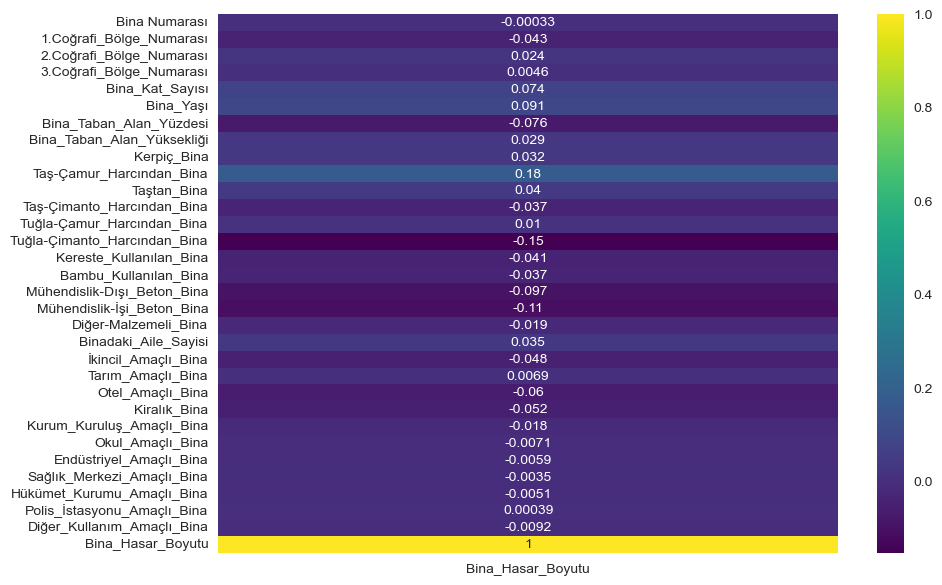

In [21]:
# Bağımsız değişkenlerin bağımlı değişkenle korelasyonu       
# Korelasyon bagımlı ve bagımsız değer arasındaki ilişkiyi belirlemek için kullanılır.
plt.figure(figsize=(10,7))
cor=df.corr()["Bina_Hasar_Boyutu"]
cor=pd.DataFrame(cor)
sns.heatmap(cor,annot=True,cmap="viridis")


<AxesSubplot:title={'center':'Barınma Amaçlı --- İkincil Amaçlı Bina karşılaştırması'}>

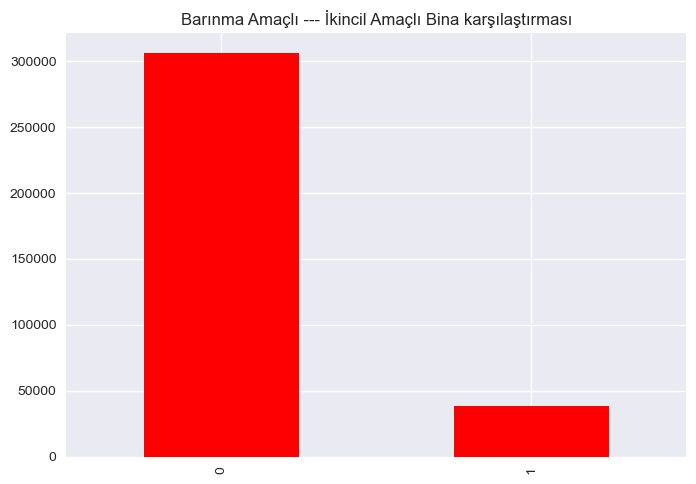

In [22]:
df['İkincil_Amaçlı_Bina'].value_counts().plot(kind="bar",color="red"
   ,title="Barınma Amaçlı --- İkincil Amaçlı Bina karşılaştırması")

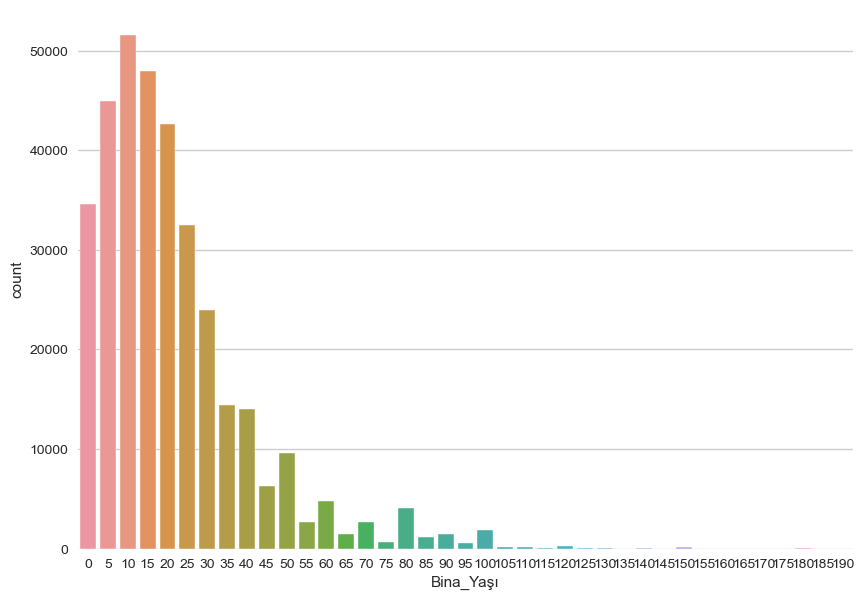

In [51]:
#Binaların Yaşların sayısı
plt.figure(figsize=(10,7))
ax=sns.countplot("Bina_Yaşı",data=df)

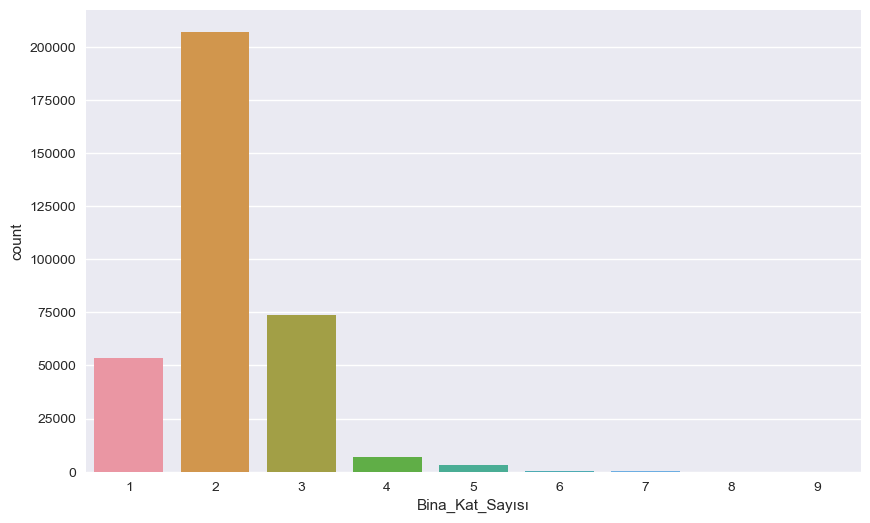

In [24]:
# Binaların kat sayıları
plt.figure(figsize=(10,6))
ax=sns.countplot("Bina_Kat_Sayısı",data=df)

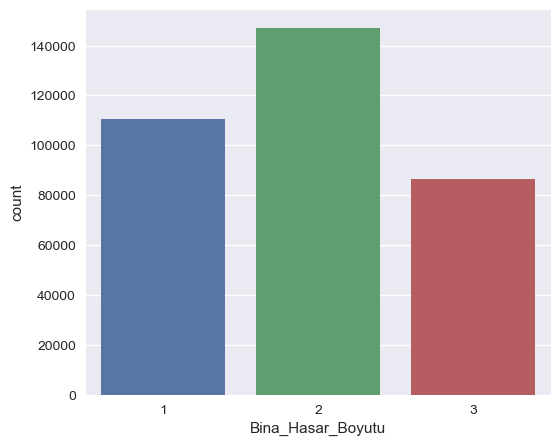

In [25]:
#Hasar büyüklüğüne bakalım.
plt.figure(figsize=(6,5))
ax=sns.countplot("Bina_Hasar_Boyutu",data=df)

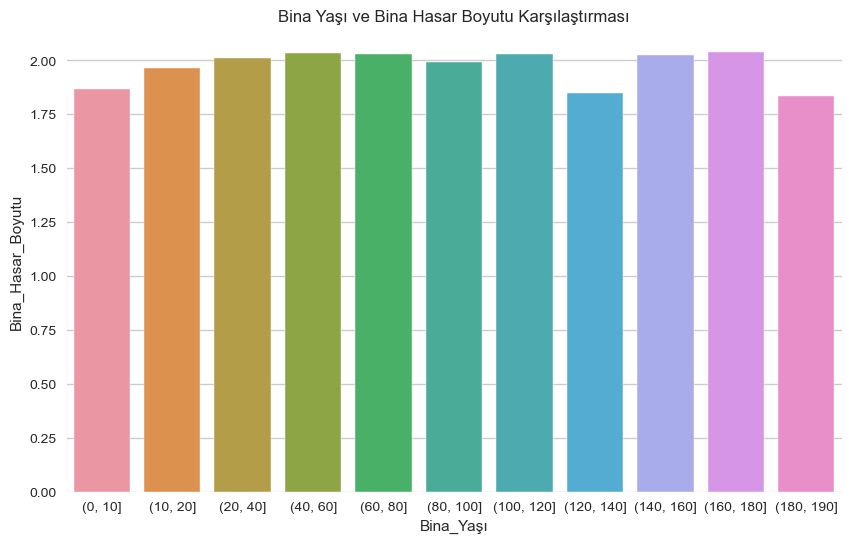

In [49]:

sns.set_style('whitegrid')

# 'Bina yaşı' ve 'Bina_Hasar_Boyutu' sütunlarını seçin
Bina_Yaşı_vs_Bina_Hasar_Boyutu = df[['Bina_Yaşı', 'Bina_Hasar_Boyutu']]

# 'Bina yaşı' sütununu kategorik olarak ayarlayın
Bina_Yaşı_vs_Bina_Hasar_Boyutu['Bina_Yaşı'] = pd.cut(Bina_Yaşı_vs_Bina_Hasar_Boyutu['Bina_Yaşı']
                                                     , bins=[0, 10, 20, 40, 60, 80, 100, 120, 140, 160
                                                             , 180,190])

# Her kategorideki 'Bina_Hasar_Boyutu' ortalamasını hesaplayın
Bina_Yaşı_vs_Bina_Hasar_Boyutu = Bina_Yaşı_vs_Bina_Hasar_Boyutu.groupby('Bina_Yaşı', as_index=False).mean()

# Çubuk grafiği (barplot) çizin
plt.figure(figsize=(10, 6))
sns.barplot(x='Bina_Yaşı', y='Bina_Hasar_Boyutu', data=Bina_Yaşı_vs_Bina_Hasar_Boyutu)

plt.title('Bina Yaşı ve Bina Hasar Boyutu Karşılaştırması')
plt.xlabel('Bina_Yaşı')
plt.ylabel('Bina_Hasar_Boyutu')

plt.show()

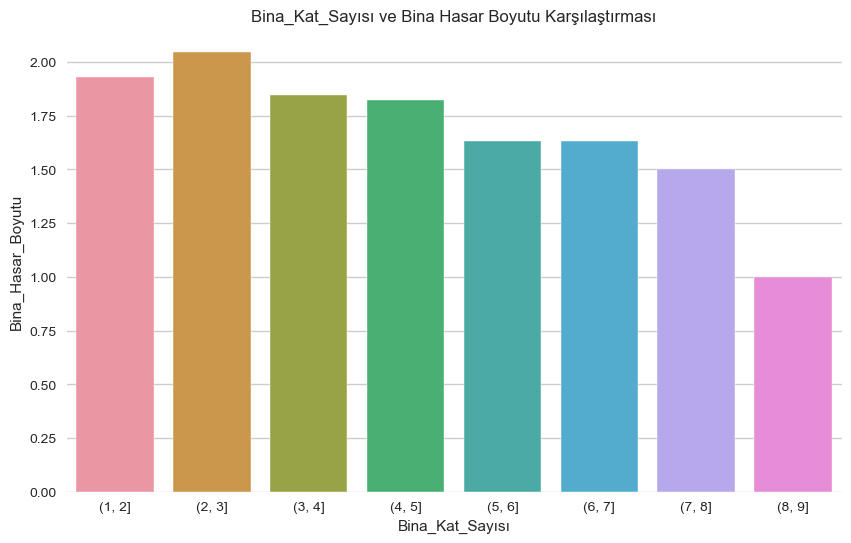

In [27]:
sns.set_style('whitegrid')

# 'Bina_Kat_Sayısı' ve 'Bina_Hasar_Boyutu' sütunları
Bina_Kat_Sayısı_vs_Bina_Hasar_Boyutu = df[['Bina_Kat_Sayısı', 'Bina_Hasar_Boyutu']]

# 'Bina_Kat_Sayısı' sütununu kategorik olarak ayarlama
Bina_Kat_Sayısı_vs_Bina_Hasar_Boyutu['Bina_Kat_Sayısı'] = pd.cut(Bina_Kat_Sayısı_vs_Bina_Hasar_Boyutu['Bina_Kat_Sayısı']
                                                     , bins=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, ])
                                                       

# Her kategorideki 'Bina_Hasar_Boyutu' ortalamasını hesaplayın
Bina_Kat_Sayısı_vs_Bina_Hasar_Boyutu = Bina_Kat_Sayısı_vs_Bina_Hasar_Boyutu.groupby('Bina_Kat_Sayısı', as_index=False).mean()

# Çubuk grafiği (barplot) 
plt.figure(figsize=(10, 6))
sns.barplot(x='Bina_Kat_Sayısı', y='Bina_Hasar_Boyutu', data=Bina_Kat_Sayısı_vs_Bina_Hasar_Boyutu)

plt.title('Bina_Kat_Sayısı ve Bina Hasar Boyutu Karşılaştırması')
plt.xlabel('Bina_Kat_Sayısı')
plt.ylabel('Bina_Hasar_Boyutu')

plt.show()

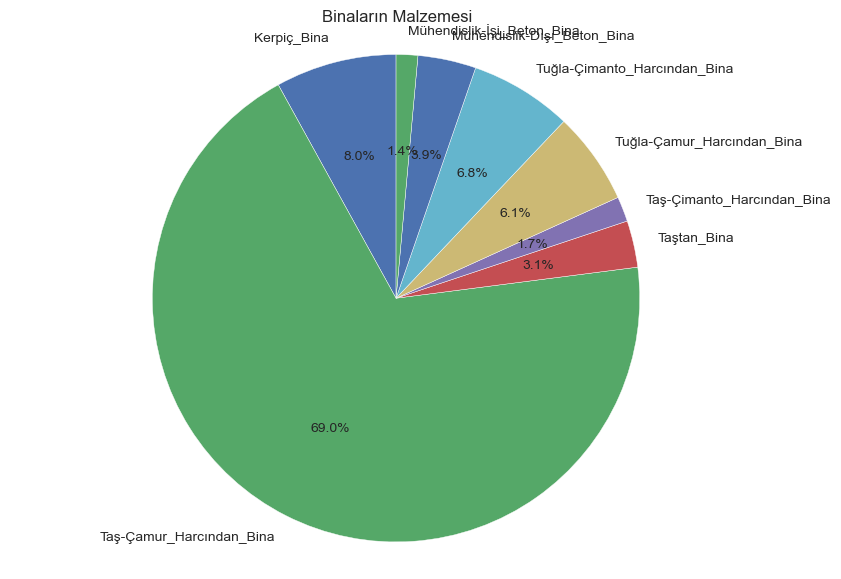

In [50]:
fig = plt.figure(figsize =(10, 7))


Kerpiç = df['Kerpiç_Bina'].sum()
Taş_Çamur = df['Taş-Çamur_Harcından_Bina'].sum()
Taş=df['Taştan_Bina'].sum()
TaşÇimanto= df['Taş-Çimanto_Harcından_Bina'].sum()    
TuğlaÇamur = df['Tuğla-Çamur_Harcından_Bina'].sum()    
TuğlaÇimanto=  df['Tuğla-Çimanto_Harcından_Bina'].sum()
MuhendislikDışı= df['Mühendislik-Dışı_Beton_Bina'].sum()    
MuhendislikIşi=  df['Mühendislik-İşi_Beton_Bina'].sum()    


labels = ['Kerpiç_Bina', 'Taş-Çamur_Harcından_Bina','Taştan_Bina','Taş-Çimanto_Harcından_Bina','Tuğla-Çamur_Harcından_Bina'
          ,'Tuğla-Çimanto_Harcından_Bina','Mühendislik-Dışı_Beton_Bina','Mühendislik-İşi_Beton_Bina']
sizes = [Kerpiç, Taş_Çamur,Taş,TaşÇimanto,TuğlaÇamur,TuğlaÇimanto,MuhendislikDışı,MuhendislikIşi]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)


plt.axis('equal')
plt.title("Binaların Malzemesi")

plt.show()


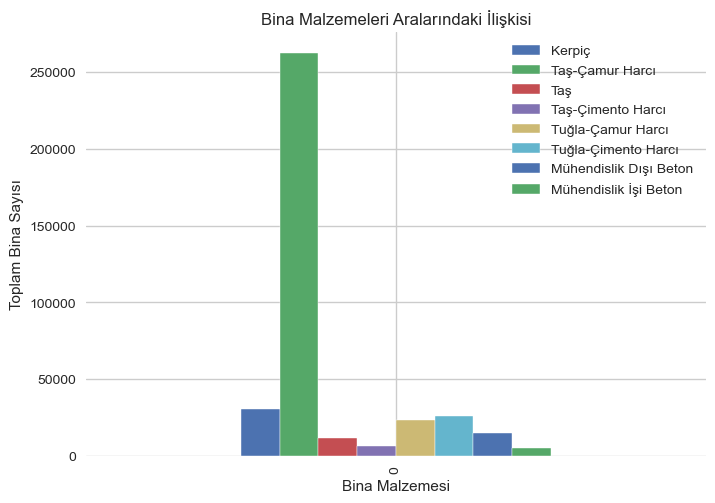

In [30]:

data = {'Kerpiç': [df.loc[df['Kerpiç_Bina'] == 1, 'Bina_Kat_Sayısı'].count()],
        'Taş-Çamur Harcı': [df.loc[df['Taş-Çamur_Harcından_Bina'] == 1, 'Bina_Kat_Sayısı'].count()],
        'Taş': [df.loc[df['Taştan_Bina'] == 1, 'Bina_Kat_Sayısı'].count()],
        'Taş-Çimento Harcı': [df.loc[df['Taş-Çimanto_Harcından_Bina'] == 1, 'Bina_Kat_Sayısı'].count()],
        'Tuğla-Çamur Harcı': [df.loc[df['Tuğla-Çamur_Harcından_Bina'] == 1, 'Bina_Kat_Sayısı'].count()],
        'Tuğla-Çimento Harcı': [df.loc[df['Tuğla-Çimanto_Harcından_Bina'] == 1, 'Bina_Kat_Sayısı'].count()],
        'Mühendislik Dışı Beton': [df.loc[df['Mühendislik-Dışı_Beton_Bina'] == 1, 'Bina_Kat_Sayısı'].count()],
        'Mühendislik İşi Beton': [df.loc[df['Mühendislik-İşi_Beton_Bina'] == 1, 'Bina_Kat_Sayısı'].count()]}
df2 = pd.DataFrame(data)

# Çubuk grafiğini çizdir
df2.plot(kind='bar')
plt.xlabel('Bina Malzemesi')
plt.ylabel('Toplam Bina Sayısı')
plt.title('Bina Malzemeleri Aralarındaki İlişkisi')
plt.show()

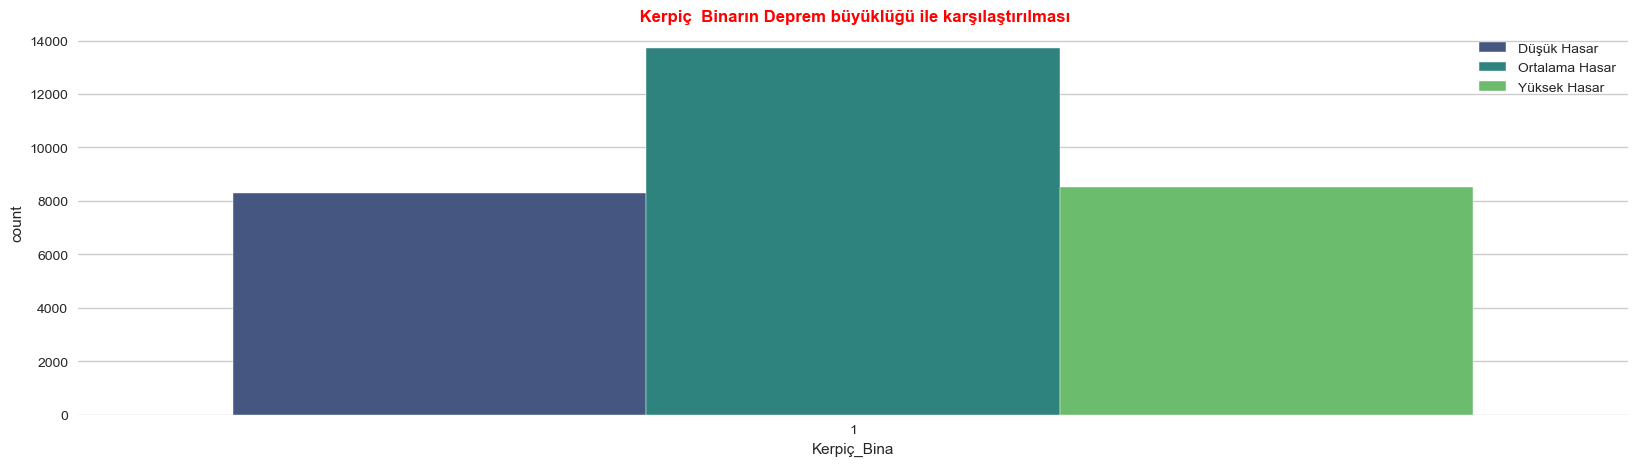

In [31]:
df_filtered = df[df["Kerpiç_Bina"] == 1]
plt.figure(figsize=(20,5))
sns.countplot(df_filtered["Kerpiç_Bina"],hue=df_filtered.Bina_Hasar_Boyutu,palette="viridis")
plt.title(" Kerpiç  Binarın Deprem büyüklüğü ile karşılaştırılması",
          fontweight="bold",color="red")
plt.legend(["Düşük Hasar","Ortalama Hasar","Yüksek Hasar"]) 
plt.show()



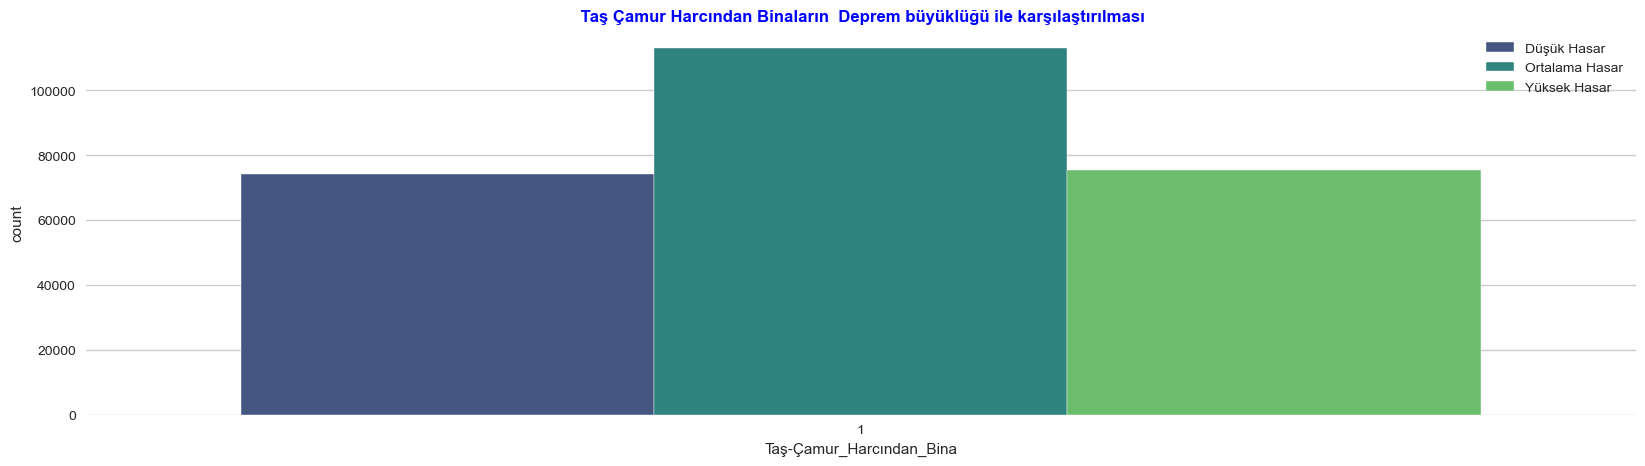

In [32]:
df_filtered = df[df["Taş-Çamur_Harcından_Bina"] == 1]
plt.figure(figsize=(20,5))
sns.countplot(df_filtered["Taş-Çamur_Harcından_Bina"],hue=df_filtered.Bina_Hasar_Boyutu,palette="viridis")
plt.title(" Taş Çamur Harcından Binaların  Deprem büyüklüğü ile karşılaştırılması",
          fontweight="bold",color="blue")
plt.legend(["Düşük Hasar","Ortalama Hasar","Yüksek Hasar"]) 
plt.show()

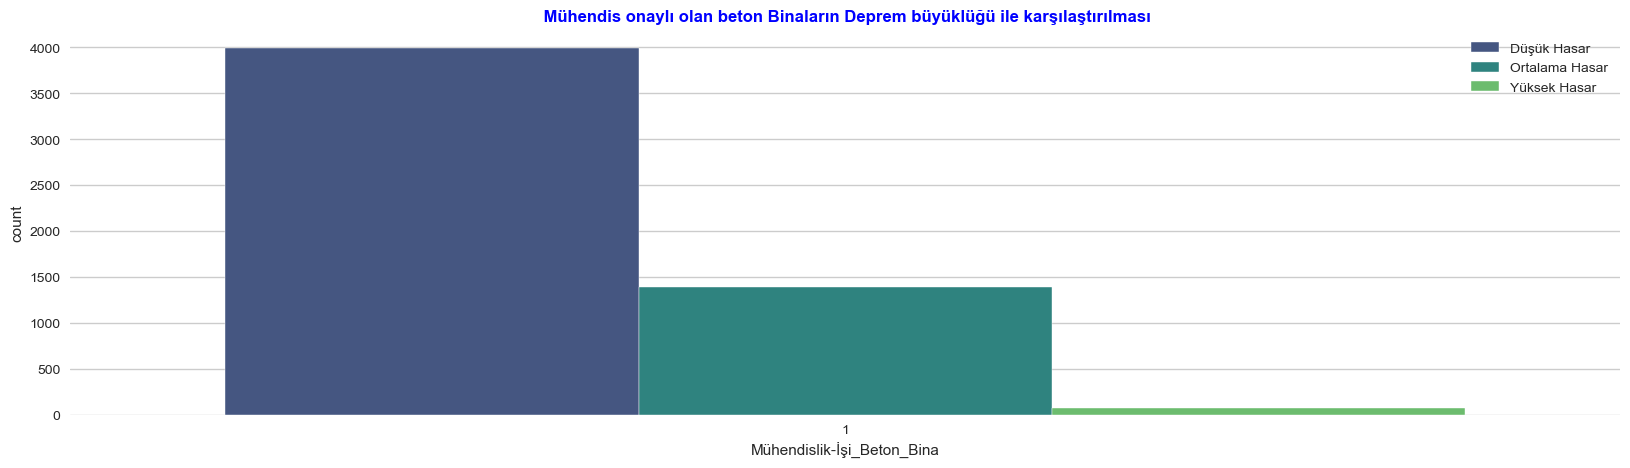

In [33]:
df_filtered = df[df["Mühendislik-İşi_Beton_Bina"] == 1]
plt.figure(figsize=(20,5))
sns.countplot(df_filtered["Mühendislik-İşi_Beton_Bina"],hue=df_filtered.Bina_Hasar_Boyutu,palette="viridis")
plt.title(" Mühendis onaylı olan beton Binaların Deprem büyüklüğü ile karşılaştırılması",
          fontweight="bold",color="blue")
plt.legend(["Düşük Hasar","Ortalama Hasar","Yüksek Hasar"]) 
plt.show()

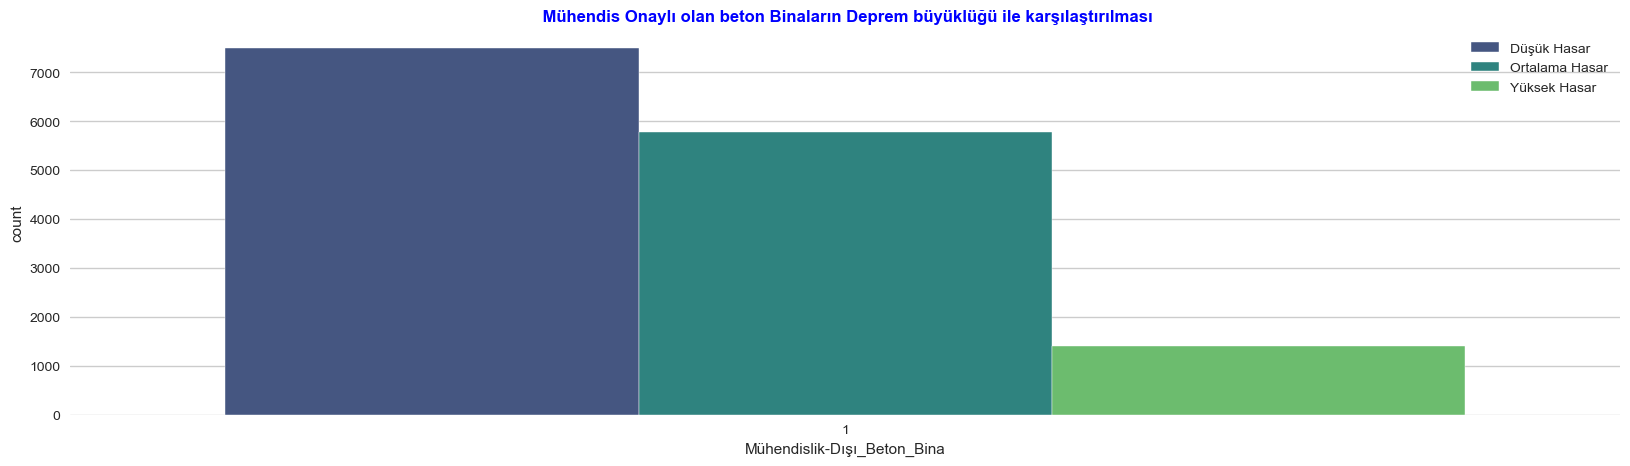

In [34]:
df_filtered = df[df["Mühendislik-Dışı_Beton_Bina"] == 1]
plt.figure(figsize=(20,5))
sns.countplot(df_filtered["Mühendislik-Dışı_Beton_Bina"],hue=df_filtered.Bina_Hasar_Boyutu,palette="viridis")
plt.title(" Mühendis Onaylı olan beton Binaların Deprem büyüklüğü ile karşılaştırılması",
          fontweight="bold",color="blue")
plt.legend(["Düşük Hasar","Ortalama Hasar","Yüksek Hasar"]) 
plt.show()

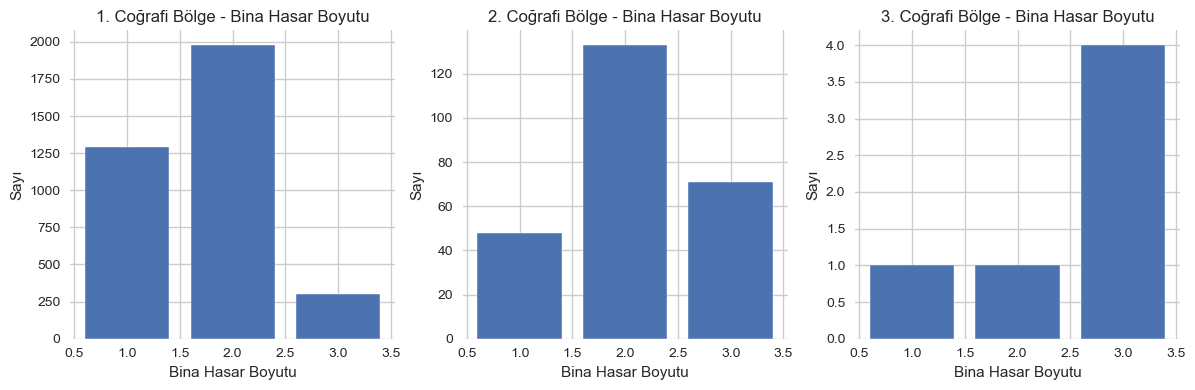

In [36]:
# 1. coğrafi bölge için 'Bina_Hasar_Boyutu' analizi
df_cog1 = df[df['1.Coğrafi_Bölge_Numarası'] == 1]
bina_hasar_counts = df_cog1['Bina_Hasar_Boyutu'].value_counts()
# 2. coğrafi bölge için 'Bina_Hasar_Boyutu' analizi
df_cog2=df[df['2.Coğrafi_Bölge_Numarası'] == 1]
bina_hasar_counts2 = df_cog2['Bina_Hasar_Boyutu'].value_counts()

# 3. coğrafi bölge için 'Bina_Hasar_Boyutu' analizi
df_cog3=df[df['3.Coğrafi_Bölge_Numarası'] == 1]
bina_hasar_counts3 = df_cog3['Bina_Hasar_Boyutu'].value_counts()

# Subplotlar oluşturma
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

# 1. subplot
ax1.bar(bina_hasar_counts.index, bina_hasar_counts.values)
ax1.set_title('1. Coğrafi Bölge - Bina Hasar Boyutu')
ax1.set_xlabel('Bina Hasar Boyutu')
ax1.set_ylabel('Sayı')

# 2. subplot
ax2.bar(bina_hasar_counts2.index, bina_hasar_counts2.values)
ax2.set_title('2. Coğrafi Bölge - Bina Hasar Boyutu')
ax2.set_xlabel('Bina Hasar Boyutu')
ax2.set_ylabel('Sayı')

# 3. subplot
ax3.bar(bina_hasar_counts3.index, bina_hasar_counts3.values)
ax3.set_title('3. Coğrafi Bölge - Bina Hasar Boyutu')
ax3.set_xlabel('Bina Hasar Boyutu')
ax3.set_ylabel('Sayı')

# Subplotlar arasındaki yükseklik ayarı
plt.tight_layout()
plt.show()


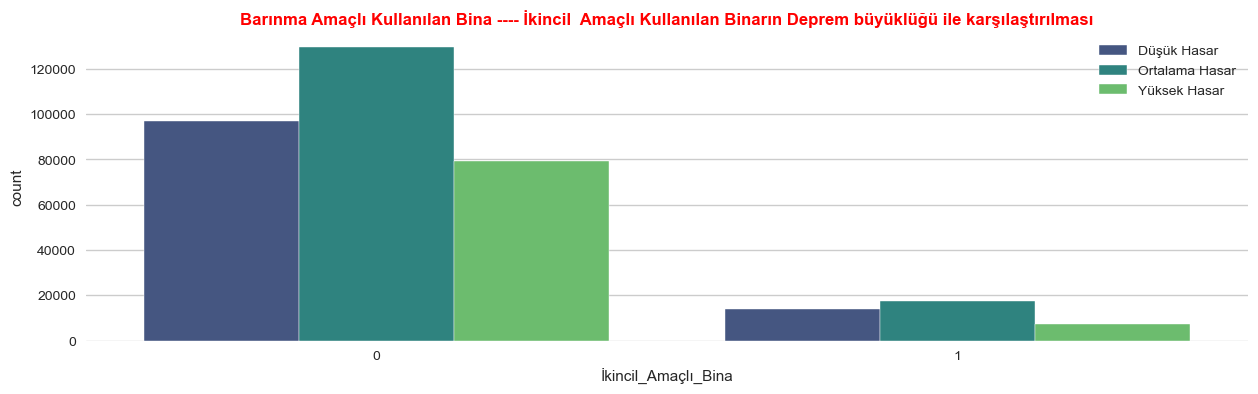

In [37]:
# İkincil amaç olarak Kullanılan bina vs Barınma Amaçlı Kullanılan Bina ile depremin boyutunun karşılaştırılması.
plt.figure(figsize=(15,4))
sns.countplot(df["İkincil_Amaçlı_Bina"],hue=df.Bina_Hasar_Boyutu,palette="viridis")
plt.title("Barınma Amaçlı Kullanılan Bina"+ " ---- İkincil  Amaçlı Kullanılan Binarın Deprem büyüklüğü ile karşılaştırılması"
          ,fontweight="bold",color="red")
plt.legend(["Düşük Hasar","Ortalama Hasar","Yüksek Hasar"]) 
plt.show()



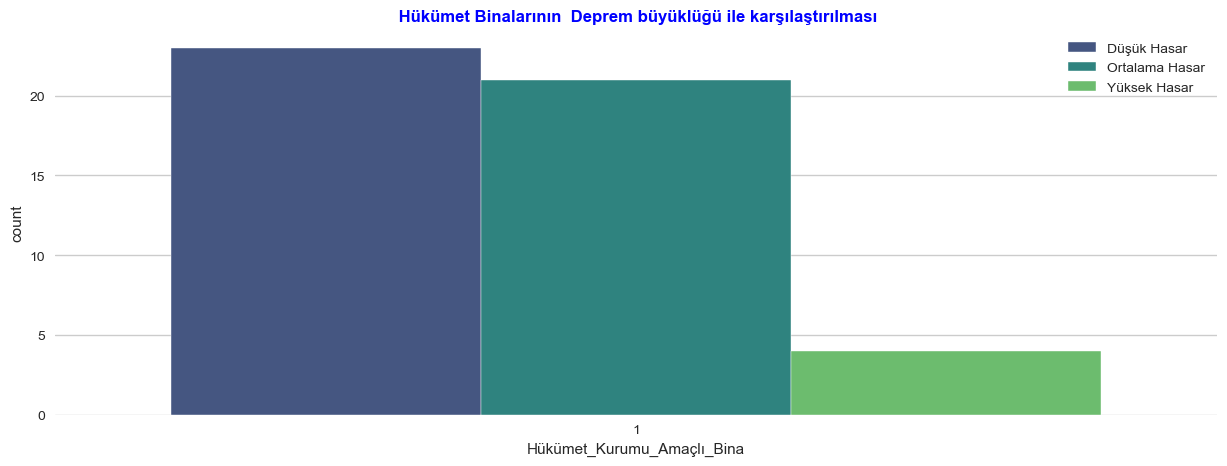

In [38]:
df_filtered = df[df["Hükümet_Kurumu_Amaçlı_Bina"] == 1]
plt.figure(figsize=(15,5))
sns.countplot(df_filtered["Hükümet_Kurumu_Amaçlı_Bina"],hue=df_filtered.Bina_Hasar_Boyutu,palette="viridis")
plt.title(" Hükümet Binalarının  Deprem büyüklüğü ile karşılaştırılması",
          fontweight="bold",color="blue")
plt.legend(["Düşük Hasar","Ortalama Hasar","Yüksek Hasar"]) 
plt.show()



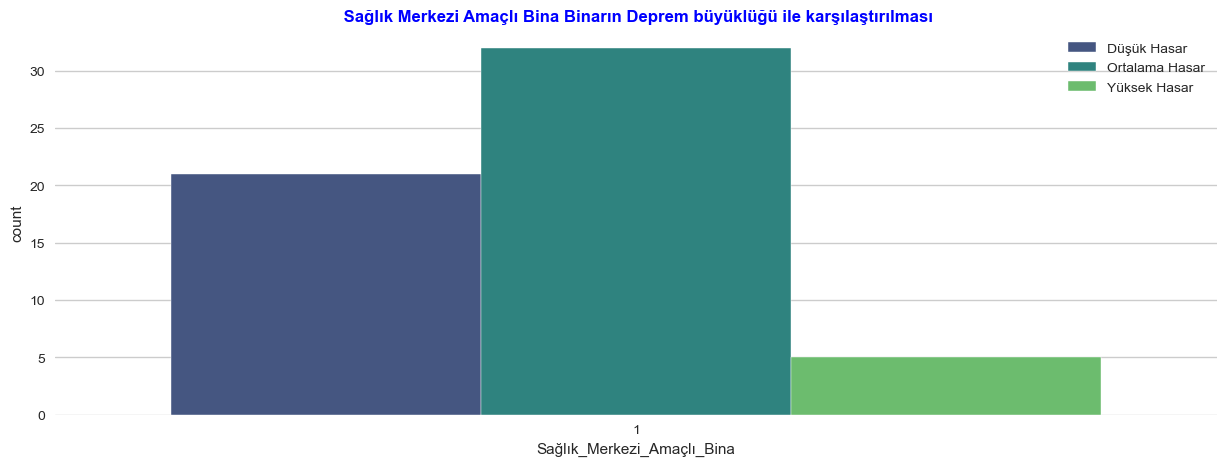

In [39]:
df_filtered = df[df["Sağlık_Merkezi_Amaçlı_Bina"] == 1]
plt.figure(figsize=(15,5))
sns.countplot(df_filtered["Sağlık_Merkezi_Amaçlı_Bina"],hue=df_filtered.Bina_Hasar_Boyutu,palette="viridis")
plt.title(" Sağlık Merkezi Amaçlı Bina Binarın Deprem büyüklüğü ile karşılaştırılması",
          fontweight="bold",color="blue")
plt.legend(["Düşük Hasar","Ortalama Hasar","Yüksek Hasar"]) 
plt.show()

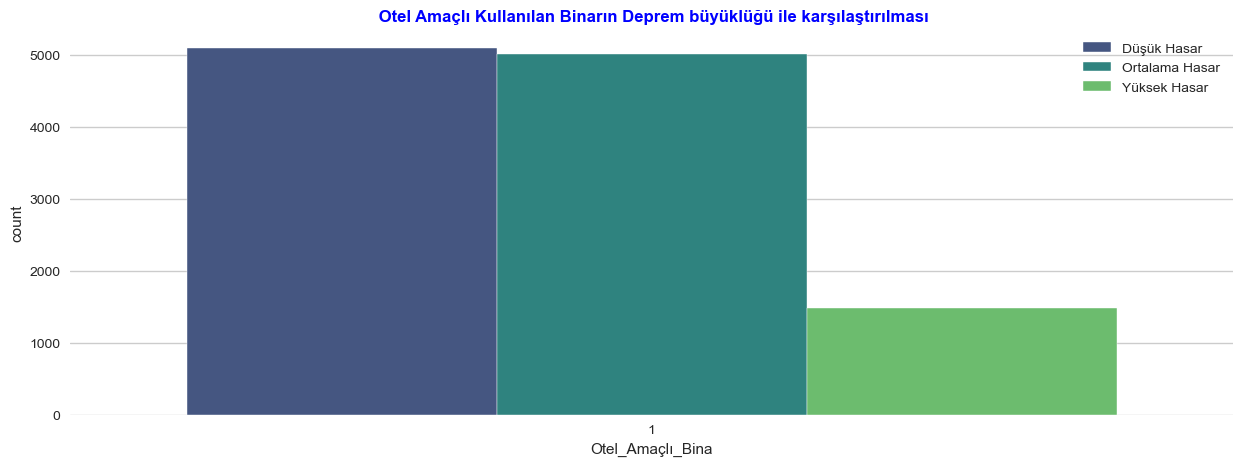

In [40]:
df_filtered = df[df["Otel_Amaçlı_Bina"] == 1]
plt.figure(figsize=(15,5))
sns.countplot(df_filtered["Otel_Amaçlı_Bina"],hue=df_filtered.Bina_Hasar_Boyutu,palette="viridis")
plt.title(" Otel Amaçlı Kullanılan Binarın Deprem büyüklüğü ile karşılaştırılması",
          fontweight="bold",color="blue")
plt.legend(["Düşük Hasar","Ortalama Hasar","Yüksek Hasar"]) 
plt.show()


#            Makine öğrenmesi  Ve Veri Setimizin Eğitilmesi  kısmı

In [42]:
#Kullanıcak algoritma için kütüphaneler import edilir.
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344491 entries, 0 to 86867
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Bina Numarası                 344491 non-null  int64 
 1   1.Coğrafi_Bölge_Numarası      344491 non-null  int64 
 2   2.Coğrafi_Bölge_Numarası      344491 non-null  int64 
 3   3.Coğrafi_Bölge_Numarası      344491 non-null  int64 
 4   Bina_Kat_Sayısı               344491 non-null  int64 
 5   Bina_Yaşı                     344491 non-null  int64 
 6   Bina_Taban_Alan_Yüzdesi       344491 non-null  int64 
 7   Bina_Taban_Alan_Yüksekliği    344491 non-null  int64 
 8   Bina_arazisi_yüzey_durumu     344491 non-null  object
 9   İnşaat_Temelinin_Tipi         344491 non-null  object
 10  Çatı_Tipi                     344491 non-null  object
 11  Zemin_Katın_Tipi              344491 non-null  object
 12  Diğer_Katların_Tipi           344491 non-null  object
 13  

In [44]:
df.head(10)

,Bina Numarası,1.Coğrafi_Bölge_Numarası,2.Coğrafi_Bölge_Numarası,3.Coğrafi_Bölge_Numarası,Bina_Kat_Sayısı,Bina_Yaşı,Bina_Taban_Alan_Yüzdesi,Bina_Taban_Alan_Yüksekliği,Bina_arazisi_yüzey_durumu,İnşaat_Temelinin_Tipi,Çatı_Tipi,Zemin_Katın_Tipi,Diğer_Katların_Tipi,Bina_Konumu,Bina_Plan_Yapılandırması,Kerpiç_Bina,Taş-Çamur_Harcından_Bina,Taştan_Bina,Taş-Çimanto_Harcından_Bina,Tuğla-Çamur_Harcından_Bina,Tuğla-Çimanto_Harcından_Bina,Kereste_Kullanılan_Bina,Bambu_Kullanılan_Bina,Mühendislik-Dışı_Beton_Bina,Mühendislik-İşi_Beton_Bina,Diğer-Malzemeli_Bina,Binanın_Yasal_Durumu,Binadaki_Aile_Sayisi,İkincil_Amaçlı_Bina,Tarım_Amaçlı_Bina,Otel_Amaçlı_Bina,Kiralık_Bina,Kurum_Kuruluş_Amaçlı_Bina,Okul_Amaçlı_Bina,Endüstriyel_Amaçlı_Bina,Sağlık_Merkezi_Amaçlı_Bina,Hükümet_Kurumu_Amaçlı_Bina,Polis_İstasyonu_Amaçlı_Bina,Diğer_Kullanım_Amaçlı_Bina,Bina_Hasar_Boyutu
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,2
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1


# Kategorik verilerin int değerlere dönüştürülmesi.

In [36]:
Bina_arazisi_yüzey_durumu = df['Bina_arazisi_yüzey_durumu'].value_counts()
print(Bina_arazisi_yüzey_durumu)


t    286352
n     47077
o     11062
Name: Bina_arazisi_yüzey_durumu, dtype: int64


In [38]:

df['Bina_arazisi_yüzey_durumu'] =df['Bina_arazisi_yüzey_durumu'].replace({'t': 1, 'n': 2, 'o': 3})
df['Bina_arazisi_yüzey_durumu'].value_counts()

1    286352
2     47077
3     11062
Name: Bina_arazisi_yüzey_durumu, dtype: int64

In [39]:
#Bu yaptıklarımızı tüm kategorik veriler için yapmamız gerekiyor.

In [40]:
df['İnşaat_Temelinin_Tipi'] =df['İnşaat_Temelinin_Tipi'].replace({'r': 4, 'w': 5, 'u': 6,'i':7,'h':8})
df['Çatı_Tipi'] =df['Çatı_Tipi'].replace({'n': 9, 'q': 10, 'x': 11})
df['Zemin_Katın_Tipi']= df['Zemin_Katın_Tipi'].replace({'f': 12, 'x': 13, 'v': 14,'z':15,'m':16})

df['Diğer_Katların_Tipi'] =df['Diğer_Katların_Tipi'].replace({'q': 1, 'x': 2, 'j': 3,'s':4})
df['Bina_Konumu'] =df['Bina_Konumu'].replace({'s': 20, 't': 21, 'j': 22,'o':23})
df['Bina_Plan_Yapılandırması'] =df['Bina_Plan_Yapılandırması'].replace({'d': 24, 'q': 25, 'u': 26,'c':27,'s': 28, 'a': 29, 'o': 30,'m':31,'n':32,'f':33})
df['Binanın_Yasal_Durumu'] =df['Binanın_Yasal_Durumu'].replace({'v': 1, 'a': 2, 'w': 3,'r':4})   

                                                              
                                                                 

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 344491 entries, 0 to 86867
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Bina Numarası                 344491 non-null  int64
 1   1.Coğrafi_Bölge_Numarası      344491 non-null  int64
 2   2.Coğrafi_Bölge_Numarası      344491 non-null  int64
 3   3.Coğrafi_Bölge_Numarası      344491 non-null  int64
 4   Bina_Kat_Sayısı               344491 non-null  int64
 5   Bina_Yaşı                     344491 non-null  int64
 6   Bina_Taban_Alan_Yüzdesi       344491 non-null  int64
 7   Bina_Taban_Alan_Yüksekliği    344491 non-null  int64
 8   Bina_arazisi_yüzey_durumu     344491 non-null  int64
 9   İnşaat_Temelinin_Tipi         344491 non-null  int64
 10  Çatı_Tipi                     344491 non-null  int64
 11  Zemin_Katın_Tipi              344491 non-null  int64
 12  Diğer_Katların_Tipi           344491 non-null  int64
 13  Bina_Konumu    

In [42]:
#Verilerinizi bir pandas veri çerçevesinde yükleyin ve bağımlı değişkeni (Bina_Hasar_Boyutu) hedef değişken olarak ayırıyoruz:

y = df['Bina_Hasar_Boyutu']
X = df.drop(['Bina_Hasar_Boyutu'], axis=1)

In [43]:
#Daha sonra, verilerinizi eğitim ve test kümelerine ayırıyoruz:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
#Modelinizi eğitmek için XGBoostRegressor kullanıyoruz:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
#Eğitim işlemi tamamlandıktan sonra, modelinizi test verileriyle değerlendiriyoruz.

y_pred = model.predict(X_test)
# Performans ölçütlerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Eğitimin başarı oranı: %f" % (rmse))t

Eğitimin başarı oranı: 0.692474
